## Problem 2

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

# to print plots inline
%matplotlib inline

In [3]:
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigmaz = 0.2
mu = 0
rho = 0

In [4]:

lb_k = 10
ub_k = 13
T=60
k_grid = np.linspace(lb_k, ub_k, T)

import ar1_approx as ar1
ln_z_grid, pi = ar1.addacooper(T, mu, rho, sigmaz)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)



In [5]:

C = np.zeros((T, T, T))
for i in range(T): # loop over k_t
    for j in range(T): # loop over k_t+1
        for q in range(T): #loop over z_t
            C[i, j, q] = z_grid[q]* k_grid[i]**alpha + (1 - delta)*k_grid[i] - k_grid[j]
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999


In [6]:

VFtol = 1e-6 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((T, T)) # initial guess at value function
Vmat = np.zeros((T, T, T)) # initialize Vmat matrix
Vstore = np.zeros((T, T, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    
    for i in range(T): # loop over k_t
        for j in range(T): # loop over k_t+1
            for q in range(T): #loop over z_t
                EV = 0
                for qq in range(T):
                    EV += pi_z[q, qq]*V[j, qq]
                Vmat[i, j, q] = U[i, j, q] + beta * EV
    print( "ITERATION: ",VFiter, ", DISTANCE IS ",VFdist )
    Vstore[:,:, VFiter] = V.reshape(T, T,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator over k_t+1
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  5.2679396139508
ITERATION:  3 , DISTANCE IS  3.090559199888121
ITERATION:  4 , DISTANCE IS  2.8002506796346065
ITERATION:  5 , DISTANCE IS  2.616099018915172
ITERATION:  6 , DISTANCE IS  2.4819149199332333
ITERATION:  7 , DISTANCE IS  2.369442806890804
ITERATION:  8 , DISTANCE IS  2.267673183988652
ITERATION:  9 , DISTANCE IS  2.172857395717461
ITERATION:  10 , DISTANCE IS  2.0833540823576087
ITERATION:  11 , DISTANCE IS  1.9983072808102307
ITERATION:  12 , DISTANCE IS  1.9172031866428512
ITERATION:  13 , DISTANCE IS  1.8396868204592671
ITERATION:  14 , DISTANCE IS  1.7655013414361989
ITERATION:  15 , DISTANCE IS  1.6944451582581088
ITERATION:  16 , DISTANCE IS  1.6263428928414
ITERATION:  17 , DISTANCE IS  1.5610464470134104
ITERATION:  18 , DISTANCE IS  1.498419486504062
ITERATION:  19 , DISTANCE IS  1.4383416836174803
ITERATION:  20 , DISTANCE IS  1.38070064872759
ITERATION:  21 , DISTANCE IS  1.325389435705162
ITERATION:

ITERATION:  165 , DISTANCE IS  0.0037092185599760796
ITERATION:  166 , DISTANCE IS  0.0035608498175889736
ITERATION:  167 , DISTANCE IS  0.003418415824882004
ITERATION:  168 , DISTANCE IS  0.0032816791918861554
ITERATION:  169 , DISTANCE IS  0.003150412024211846
ITERATION:  170 , DISTANCE IS  0.003024395543249625
ITERATION:  171 , DISTANCE IS  0.00290341972151964
ITERATION:  172 , DISTANCE IS  0.002787282932672497
ITERATION:  173 , DISTANCE IS  0.0026757916153457018
ITERATION:  174 , DISTANCE IS  0.00256875995074779
ITERATION:  175 , DISTANCE IS  0.0024660095527480053
ITERATION:  176 , DISTANCE IS  0.0023673691706278532
ITERATION:  177 , DISTANCE IS  0.0022726744037981916
ITERATION:  178 , DISTANCE IS  0.002181767427643422
ITERATION:  179 , DISTANCE IS  0.002094496730535411
ITERATION:  180 , DISTANCE IS  0.002010716861320816
ITERATION:  181 , DISTANCE IS  0.0019302881868838995
ITERATION:  182 , DISTANCE IS  0.001853076659386943
ITERATION:  183 , DISTANCE IS  0.001778953593031929
ITERAT

ITERATION:  319 , DISTANCE IS  6.903229575527803e-06
ITERATION:  320 , DISTANCE IS  6.627100390232954e-06
ITERATION:  321 , DISTANCE IS  6.36201639281353e-06
ITERATION:  322 , DISTANCE IS  6.107535739374725e-06
ITERATION:  323 , DISTANCE IS  5.86323432116842e-06
ITERATION:  324 , DISTANCE IS  5.628704940363605e-06
ITERATION:  325 , DISTANCE IS  5.403556727401337e-06
ITERATION:  326 , DISTANCE IS  5.1874144872954275e-06
ITERATION:  327 , DISTANCE IS  4.979917889613716e-06
ITERATION:  328 , DISTANCE IS  4.780721184260983e-06
ITERATION:  329 , DISTANCE IS  4.589492320405952e-06
ITERATION:  330 , DISTANCE IS  4.405912648053345e-06
ITERATION:  331 , DISTANCE IS  4.229676136446869e-06
ITERATION:  332 , DISTANCE IS  4.060489104062981e-06
ITERATION:  333 , DISTANCE IS  3.8980695364898565e-06
ITERATION:  334 , DISTANCE IS  3.7421467737885905e-06
ITERATION:  335 , DISTANCE IS  3.592460885215587e-06
ITERATION:  336 , DISTANCE IS  3.4487624560597396e-06
ITERATION:  337 , DISTANCE IS  3.31081196236

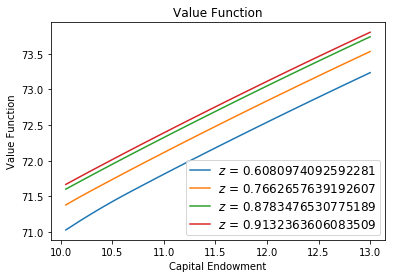

In [7]:
# Plot value function
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[15]))
ax.plot(k_grid[1:], VF[1:, 19], label='$z$ = ' + str(z_grid[19]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Capital Endowment')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()
plt.savefig("e2value")

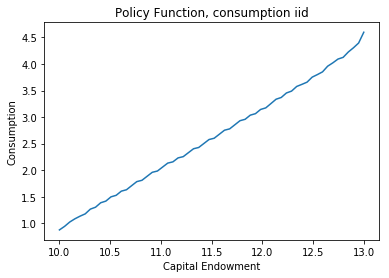

In [7]:
#Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][18], label='Consumption')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Capital Endowment')
plt.ylabel('Consumption')
plt.title('Policy Function, consumption iid')
plt.show()
plt.savefig('e2ct')

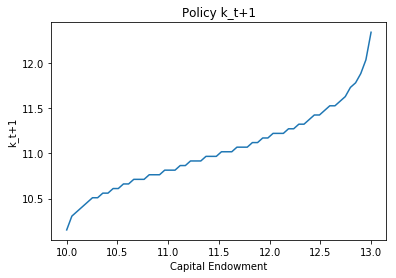

In [8]:
#Plot optimal capital in period t + 1 rule as a function of cake size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][18], label='Capital in period t+1')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Capital Endowment')
plt.ylabel(r'k_t+1')
plt.title('Policy k_t+1')
plt.show()
plt.savefig("e2kt1")


## Problem 3

In [9]:
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigma_v = 0.1
mu = 0
rho = 0.8

### Create Grid Space

In [10]:

lb_k = 10
ub_k = 13

k_grid = np.linspace(lb_k, ub_k, T)

import ar1_approx as ar1
ln_z_grid, pi = ar1.addacooper(T, mu, rho, sigma_v)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)


In [11]:


C = np.zeros((T, T, T))
for i in range(T): # loop over k_t
    for j in range(T): # loop over k_t+1
        for q in range(T): #loop over z_t
            C[i, j, q] = z_grid[q]* k_grid[i]**alpha + (1 - delta)*k_grid[i] - k_grid[j]
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999


### Value function iteration

In [13]:

VFtol = 1e-6 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((T, T)) # initial guess at value function
Vmat = np.zeros((T, T, T)) # initialize Vmat matrix
Vstore = np.zeros((T, T, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    
    for i in range(T): # loop over k_t
        for j in range(T): # loop over k_t+1
            for q in range(T): #loop over z_t
                EV = 0
                for qq in range(T):
                    EV += pi_z[q, qq]*V[j, qq]
                Vmat[i, j, q] = U[i, j, q] + beta * EV
    print( "ITERATION: ",VFiter, ", DISTANCE IS ",VFdist )
    Vstore[:,:, VFiter] = V.reshape(T, T,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator over k_t+1
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  5.12749148234663
ITERATION:  3 , DISTANCE IS  3.503084437404895
ITERATION:  4 , DISTANCE IS  3.1815059610463745
ITERATION:  5 , DISTANCE IS  2.947121828907232
ITERATION:  6 , DISTANCE IS  2.7508040667030667
ITERATION:  7 , DISTANCE IS  2.5802933198069127
ITERATION:  8 , DISTANCE IS  2.4311726504272784
ITERATION:  9 , DISTANCE IS  2.298704962829465
ITERATION:  10 , DISTANCE IS  2.179647243363412
ITERATION:  11 , DISTANCE IS  2.07155741365991
ITERATION:  12 , DISTANCE IS  1.9725578063498936
ITERATION:  13 , DISTANCE IS  1.8811867736657462
ITERATION:  14 , DISTANCE IS  1.7962971543499293
ITERATION:  15 , DISTANCE IS  1.7169825805508125
ITERATION:  16 , DISTANCE IS  1.6425220069501592
ITERATION:  17 , DISTANCE IS  1.5723378828964272
ITERATION:  18 , DISTANCE IS  1.505963892340219
ITERATION:  19 , DISTANCE IS  1.44302065353682
ITERATION:  20 , DISTANCE IS  1.3831958960626238
ITERATION:  21 , DISTANCE IS  1.3262299182824933
ITERAT

ITERATION:  165 , DISTANCE IS  0.0036926153073721935
ITERATION:  166 , DISTANCE IS  0.0035449106950835585
ITERATION:  167 , DISTANCE IS  0.0034031142672716896
ITERATION:  168 , DISTANCE IS  0.003266989696555811
ITERATION:  169 , DISTANCE IS  0.0031363101086867573
ITERATION:  170 , DISTANCE IS  0.0030108577043677087
ITERATION:  171 , DISTANCE IS  0.0028904233961668524
ITERATION:  172 , DISTANCE IS  0.002774806460266177
ITERATION:  173 , DISTANCE IS  0.0026638142018811095
ITERATION:  174 , DISTANCE IS  0.00255726163379677
ITERATION:  175 , DISTANCE IS  0.0024549711684329623
ITERATION:  176 , DISTANCE IS  0.0023567723216899594
ITERATION:  177 , DISTANCE IS  0.0022625014288308876
ITERATION:  178 , DISTANCE IS  0.0021720013717043685
ITERATION:  179 , DISTANCE IS  0.0020851213168384675
ITERATION:  180 , DISTANCE IS  0.0020017164641217278
ITERATION:  181 , DISTANCE IS  0.0019216478055597008
ITERATION:  182 , DISTANCE IS  0.001844781893382219
ITERATION:  183 , DISTANCE IS  0.001770990617600887

ITERATION:  320 , DISTANCE IS  6.597436112087962e-06
ITERATION:  321 , DISTANCE IS  6.333538678404693e-06
ITERATION:  322 , DISTANCE IS  6.080197152869005e-06
ITERATION:  323 , DISTANCE IS  5.836989231511325e-06
ITERATION:  324 , DISTANCE IS  5.603509720231159e-06
ITERATION:  325 , DISTANCE IS  5.379369326874439e-06
ITERATION:  326 , DISTANCE IS  5.164194533335831e-06
ITERATION:  327 , DISTANCE IS  4.95762677132916e-06
ITERATION:  328 , DISTANCE IS  4.759321683422968e-06
ITERATION:  329 , DISTANCE IS  4.5689488530342715e-06
ITERATION:  330 , DISTANCE IS  4.3861908807230066e-06
ITERATION:  331 , DISTANCE IS  4.210743270505191e-06
ITERATION:  332 , DISTANCE IS  4.0423135203582206e-06
ITERATION:  333 , DISTANCE IS  3.880620994323181e-06
ITERATION:  334 , DISTANCE IS  3.7253961693295423e-06
ITERATION:  335 , DISTANCE IS  3.5763803367672153e-06
ITERATION:  336 , DISTANCE IS  3.433325133528342e-06
ITERATION:  337 , DISTANCE IS  3.2959921156816563e-06
ITERATION:  338 , DISTANCE IS  3.16415244

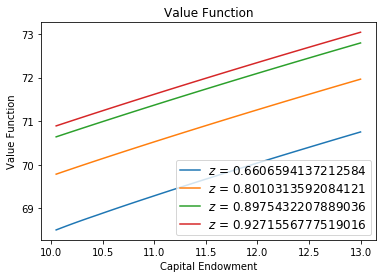

In [14]:
# Plot value function
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[15]))
ax.plot(k_grid[1:], VF[1:, 19], label='$z$ = ' + str(z_grid[19]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Capital Endowment')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()
plt.savefig("e3_value")

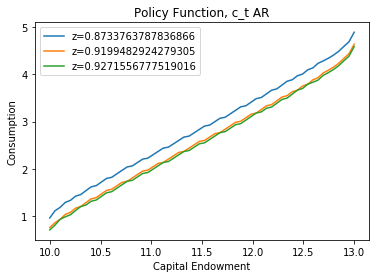

No handles with labels found to put in legend.


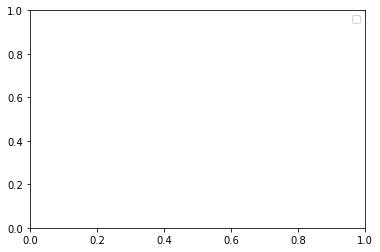

In [17]:
#Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][12], label=f'z={z_grid[12]}')
ax.plot(k_grid[:], optC[:][18], label=f'z={z_grid[18]}')
ax.plot(k_grid[:], optC[:][19], label=f'z={z_grid[19]}')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('Capital Endowment')
plt.ylabel('Consumption')
plt.title('Policy Function, c_t AR')
plt.show()
plt.legend()
plt.savefig("e3c_t")

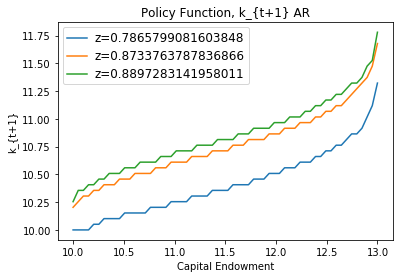

In [18]:
#Plot optimal capital in period t + 1 rule as a function of cake size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][4], label=f'z={z_grid[4]}')
ax.plot(k_grid[:], optK[:][12], label=f'z={z_grid[12]}')
ax.plot(k_grid[:], optK[:][14], label=f'z={z_grid[14]}')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Capital Endowment')
plt.ylabel(r'k_{t+1}')
plt.title('Policy Function, k_{t+1} AR')
plt.show()
plt.savefig("e3_kt1")

## Question 4

In [19]:
# Declare parameters
# Preference parameters
beta = 0.96
b = 0.05
# Taste shock parameters: AR(1) process:
mu = 0
sigma = .15
size_w = 100
rho = 0

In [20]:
'''
------------------------------------------------------------------------
Create Grid for State Space
------------------------------------------------------------------------
ub_w      = scalar, upper bound grid
size_w    = integer, number of grid points in state space
w_grid    = vector, size_w x 1 vector of grid points
------------------------------------------------------------------------
'''

import ar1_approx as ar1
ln_w_grid, pi_t = ar1.addacooper(size_w, mu, rho, sigma)
w_grid = np.exp(ln_w_grid)
pi = np.transpose(pi_t)

In [21]:

U = np.zeros(size_w) 
U = w_grid/(1-beta)


In [23]:

VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros(size_w) # initial guess at value function
TV = np.zeros(size_w)
PF_discrete = np.zeros(size_w)
Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    for i in range(size_w): # loop over w
        EV = 0
        for ii in range(size_w):  # loop over w
            EV += pi[i, ii] * V[ii]   # note can move one space because of how we constructed grid
        U_emp = U[i]
        Vun = b + beta * EV 
        TV[i] = max(U_emp, Vun)
        PF_discrete[i] = U_emp >= Vun  # = 1 if take job
    print( "ITERATION: ",VFiter, ", DISTANCE IS ",VFdist )     
    Vstore[:, VFiter] = TV # store value function at each iteration for graphing later 
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  37.28749284375401
Value function converged after this many iterations: 3


### Threshold

In [30]:
'''
------------------------------------------------------------------------
Find threshold policy functions   
------------------------------------------------------------------------
'''
threshold_w = w_grid[np.argmax(PF_discrete)]
print(threshold_w)

1.103878235513616


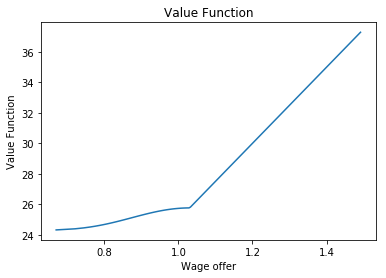

In [25]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[:], VF[:])
# Set the fontsize
plt.xlabel('Wage offer')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()
plt.savefig("e4_value")

In [27]:
#Set grid of b
grid_b = np.linspace(0.5, 1, 20)
threshold_vec = np.zeros(20)

#Begin for loop
for q in range(20):

    VFtol = 1e-8 
    VFdist = 7.0 
    VFmaxiter = 500 
    V = np.zeros(size_w) # initial guess at value function
    TV = np.zeros(size_w)
    PF_discrete = np.zeros(size_w)
    Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
    VFiter = 1 
    while VFdist > VFtol and VFiter < VFmaxiter:
        for i in range(size_w): # loop over w
            EV = 0
            for ii in range(size_w):  # loop over w
                EV += pi[i, ii] * V[ii]   # note can move one space because of how we constructed grid
            U_emp = U[i]
            Vun = grid_b[q] + beta * EV 
            TV[i] = max(U_emp, Vun)
            PF_discrete[i] = U_emp >= Vun  # = 1 if take job
        
        print( "ITERATION: ",VFiter, ", DISTANCE IS ",VFdist )
        Vstore[:, VFiter] = TV # store value function at each iteration for graphing later 
        VFdist = (np.absolute(V - TV)).max()  # check distance
        V = TV
        VFiter += 1 

    if VFiter < VFmaxiter:
        print('Value function converged after this many iterations:', VFiter)
    else:
        print('Value function did not converge')            


    VF = V # solution to the functional equation
    threshold_vec[q]=w_grid[np.argmax(PF_discrete)]

ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  37.28749284375401
Value function converged after this many iterations: 3
ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  37.28749284375401
Value function converged after this many iterations: 3
ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  37.28749284375401
Value function converged after this many iterations: 3
ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  37.28749284375401
Value function converged after this many iterations: 3
ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  37.28749284375401
Value function converged after this many iterations: 3
ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  37.28749284375401
Value function converged after this many iterations: 3
ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTANCE IS  37.28749284375401
Value function converged after this many iterations: 3
ITERATION:  1 , DISTANCE IS  7.0
ITERATION:  2 , DISTAN

In [ ]:
print(threshold_vec)

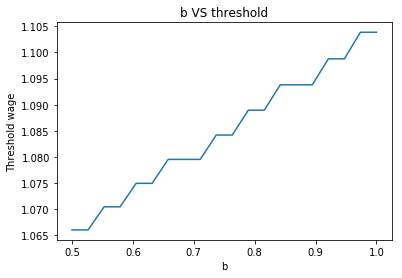

In [28]:
# Plot resevation wage as function of benefits 
plt.figure()
fig, ax = plt.subplots()
ax.plot(grid_b[:], threshold_vec[:])
# Set the fontsize
plt.xlabel('b')
plt.ylabel('Threshold wage')
plt.title('b VS threshold')
plt.show()
plt.savefig("bVSthresh")